<a href="https://colab.research.google.com/github/SHAILU0063/CSEN0063/blob/main/soft4(0063).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 0, Cost: 22150.178859084728
Iteration 1000, Cost: 11498.7390639904
Iteration 2000, Cost: 6625.660384899164
Iteration 3000, Cost: 4186.188122179257
Iteration 4000, Cost: 2846.5891156560715
Iteration 5000, Cost: 2048.7168992761085
Iteration 6000, Cost: 1542.6098439436673
Iteration 7000, Cost: 1206.5806216449012
Iteration 8000, Cost: 975.9556277038698
Iteration 9000, Cost: 813.5590611837041
Final parameters: a=42.0636, b=80.8846, c=61.2391


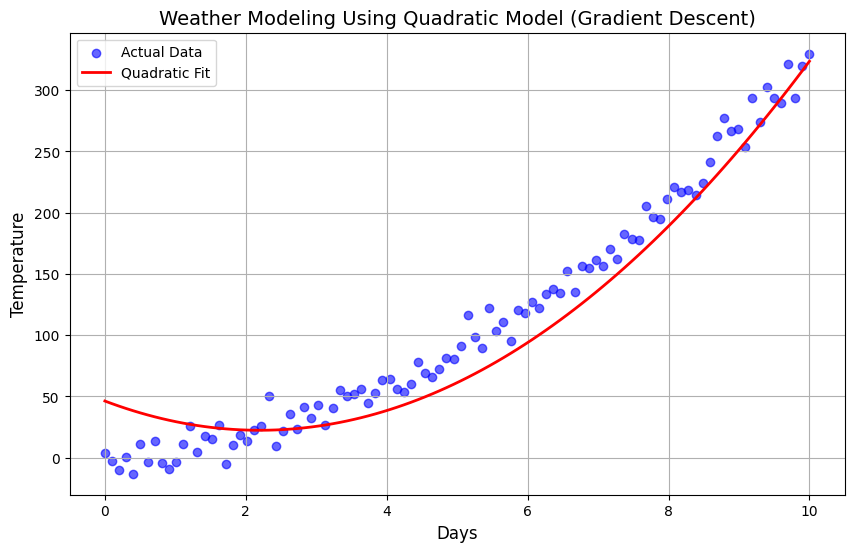

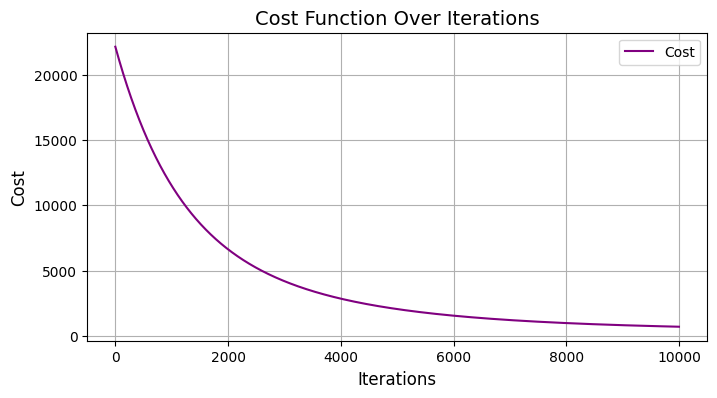

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
a, b, c = 0.0, 0.0, 0.0
learning_rate = 1e-4
iterations = 10000
lambda_reg = 0.01  # Regularization strength

# Sample data (replace these with your actual x and y data)
x = np.linspace(0, 10, 100)  # Example x data
y = 3 * x**2 + 2 * x + 1 + np.random.normal(0, 10, len(x))  # Example noisy quadratic y data

# Normalize x for better convergence
x_mean, x_std = np.mean(x), np.std(x)
x_normalized = (x - x_mean) / x_std

n = len(y)

# Gradient Descent Loop
cost_history = []
for i in range(iterations):
    # Predicted values
    y_pred = a * x_normalized**2 + b * x_normalized + c
    error = y - y_pred

    # Compute gradients
    a_gradient = (-2 / n) * np.sum(x_normalized**2 * error) + 2 * lambda_reg * a
    b_gradient = (-2 / n) * np.sum(x_normalized * error) + 2 * lambda_reg * b
    c_gradient = (-2 / n) * np.sum(error) + 2 * lambda_reg * c

    # Update parameters
    a -= learning_rate * a_gradient
    b -= learning_rate * b_gradient
    c -= learning_rate * c_gradient

    # Compute cost
    cost = np.mean(error**2) + lambda_reg * (a**2 + b**2 + c**2)
    cost_history.append(cost)

    # Print progress every 1000 iterations
    if i % 1000 == 0:
        print(f"Iteration {i}, Cost: {cost}")

# Final parameters
print(f"Final parameters: a={a:.4f}, b={b:.4f}, c={c:.4f}")

# Generate predictions using the final model
y_final_pred = a * x_normalized**2 + b * x_normalized + c

# Plot the data and the model
plt.figure(figsize=(10, 6))

# Plot actual data
plt.scatter(x, y, label='Actual Data', alpha=0.6, color='blue')

# Plot predicted quadratic fit
plt.plot(x, y_final_pred, label='Quadratic Fit', color='red', linewidth=2)

# Plot formatting
plt.title("Weather Modeling Using Quadratic Model (Gradient Descent)", fontsize=14)
plt.xlabel("Days", fontsize=12)
plt.ylabel("Temperature", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Plot cost history
plt.figure(figsize=(8, 4))
plt.plot(range(iterations), cost_history, label="Cost", color="purple")
plt.title("Cost Function Over Iterations", fontsize=14)
plt.xlabel("Iterations", fontsize=12)
plt.ylabel("Cost", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()